# Scikit-learn

In [31]:
from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [12]:
cali =fetch_california_housing(as_frame = True)

X= cali.data  # features
y=cali.target # house prices


In [13]:
X.shape

(20640, 8)

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [19]:
# First create the OBJECT

model = KNeighborsRegressor()

model.fit(X,y)

KNeighborsRegressor()

In [33]:
# making a pipeline

# list of tuples , pair of a name and step

pipe = Pipeline([
    ('scale', StandardScaler(),),
    ('Model', KNeighborsRegressor())
])

In [34]:
pipe.fit(X,y)

Pipeline(steps=[('scale', StandardScaler()), ('Model', KNeighborsRegressor())])

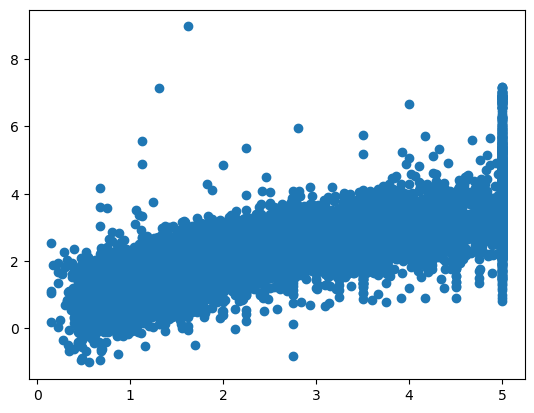

In [45]:
pred = model.predict(X)

plt.scatter(y,pred)    # differente values of what i predict 

### A lot of noise and maybe some correlation

KNeighborsRegressor checks for the nearest 5 points and with the mean of it, decides and make the prediction
Thins to consider : 

1. The columns in X can have a very different scale and this can impact the prevision, ex distance in km and area in square feat (1000). So both axes will have different behaviors. This means that maybe because of the scaling, one feature can have way more impact in the prevision than i want
2. A pipeline can be very useful to use for a large quantity of data and used in this process

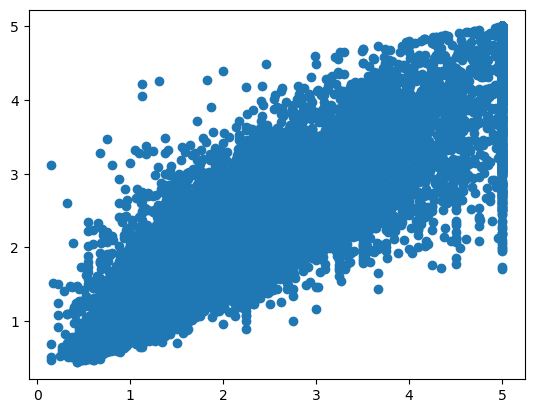

In [36]:
with_scaling = pipe.predict(X)

plt.scatter(y,with_scaling)

### Looks like picking the same model but doing a SCALING before the model, really makes a difference with less noise

But now there is a new problem : We are learning from the SAME DATA we are judging !!! it is like making a test with questions that we had already seen before, exatcly the sames

-> this changes the model into too optimistic

Changing the model of KN to see only ONE neighboor , things change

In [43]:
pipe = Pipeline([
    ("scaling", StandardScaler()),
    ("Modeling", KNeighborsRegressor(n_neighbors=1))
])

pipe.fit(X,y)

Pipeline(steps=[('scaling', StandardScaler()),
                ('Modeling', KNeighborsRegressor(n_neighbors=1))])

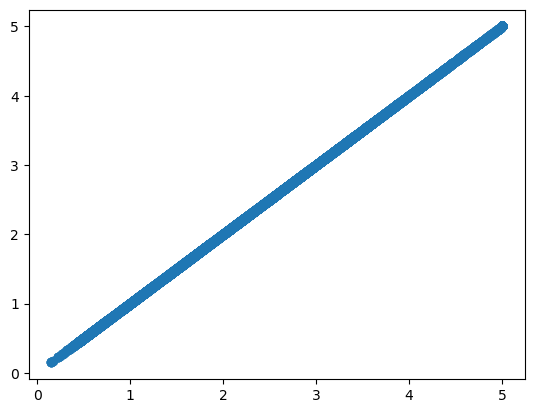

In [46]:
new_scale = pipe.predict(X)

plt.scatter(y,new_scale)

# Of course !! They use the same data for training and evaluating . Thus it considers the data itself and knows the answer